In [13]:
# 1. (Titanic Dataset)
#  1. Find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case in class.
#         a. Do you think we should keep this feature?
#  2. Do at least two visualizations to describe or show correlations.
#  3. Implement Naive Bayes method using scikit-learn library and report the accuracy

#1
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt

titanic = pd.read_csv("train.csv")
print(titanic)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [14]:
# Finding the correlation between ‘survived’ (target column) and ‘sex’ column

#2.
# converting  features to num.

titanic['Survived'] = titanic['Survived'].astype('category').cat.codes
titanic['Sex'] = titanic['Sex'].astype('category').cat.codes


correlation_Value = titanic['Sex'].corr(titanic['Survived'])# corr() function is used to find the correlation
print("\n The correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case in class is : \n",
      correlation_Value)


 The correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case in class is : 
 -0.5433513806577553


In [15]:
# visualizations to describe or show correlations using heatmap, scatterplot

#  To make data more clean iam dropping the remaining columns
data = titanic.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns')



In [16]:
# Removing all the data that has missing values
processed_data = data.dropna(axis=0)

In [17]:
# Except for sex all the categories have numerical values so,converting 'Sex' column  values to numerical values.
data1 = pd.get_dummies(processed_data, drop_first=True)

In [18]:
# Converting all category column values to Float
data1["Survived"] = data1["Survived"].astype(float)
data1["Pclass"] = data1["Pclass"].astype(float)
data1["Sex"] = data1["Sex"].astype(float)

In [19]:
#Using corr() calculated the correlation matrix function
correlation_matrix = data1.corr().round(2)  # Round to 2 decimal places
print("\n Correlation Matrix : \n", correlation_matrix)  # displaying the correlation matrix


 Correlation Matrix : 
           Survived  Pclass   Sex   Age  Fare
Survived      1.00   -0.36 -0.54 -0.08  0.27
Pclass       -0.36    1.00  0.16 -0.37 -0.55
Sex          -0.54    0.16  1.00  0.09 -0.18
Age          -0.08   -0.37  0.09  1.00  0.10
Fare          0.27   -0.55 -0.18  0.10  1.00


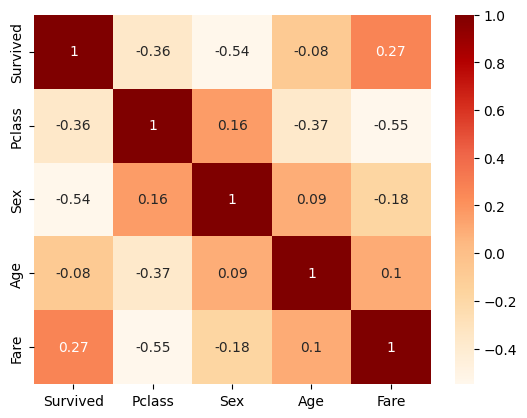

In [20]:
# Creating plot
sns.heatmap(data=correlation_matrix, annot=True,cmap="OrRd")  
# show plot
plt.show()

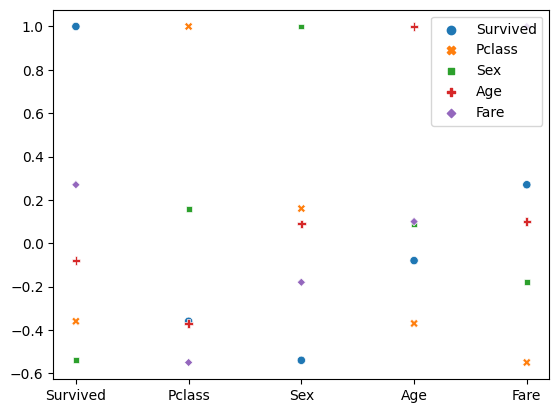

In [21]:
# Creating scatterplot
sns.scatterplot(data=correlation_matrix)
# show plot
plt.show()

In [11]:
#3 Implement Naïve Bayes method using scikit-learn library and report the accuracy.
final_df = data1.drop('Fare', axis=1)
x = final_df.drop('Survived', axis=1)
y = final_df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
classifier = GaussianNB()
y_pred = classifier.fit(x_train, y_train).predict(x_test)
print("\nNaïve Bayes method using scikit-learn library")
print("Classification Report : \n", classification_report(y_test, y_pred))
print("Confusion Matrix for Titanic dataset: \n", confusion_matrix(y_test, y_pred))



Naïve Bayes method using scikit-learn library
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.80      0.86      0.83        79
         1.0       0.81      0.73      0.77        64

    accuracy                           0.80       143
   macro avg       0.81      0.80      0.80       143
weighted avg       0.80      0.80      0.80       143

Confusion Matrix for Titanic dataset: 
 [[68 11]
 [17 47]]


In [12]:
print('The accuracy  report is', accuracy_score(y_pred, y_test))

The accuracy  report is 0.8041958041958042
